<a href="https://colab.research.google.com/github/amarabuco/seriestemporais/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 63 kB 7.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 5.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.0 MB/s 


# Imports

In [5]:
import yfinance as yf

In [6]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
import pmdarima as pm

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [11]:
import matplotlib as mpl

In [12]:
mpl.rcParams['figure.figsize'] = [10, 5]

# Dados: sustentabilidade 🌏  e finanças 💰

## CO2

![](https://images.unsplash.com/photo-1519292675981-997f3efa2da1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)

https://unsplash.com/photos/b8vCfi9UsTU

In [13]:
sm.datasets.co2.DESCRLONG

'\nAtmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.\n\nPeriod of Record: March 1958 - December 2001\n\nMethods: An Applied Physics Corporation (APC) nondispersive infrared gas analyzer was used to obtain atmospheric CO2 concentrations, based on continuous data (four measurements per hour) from atop intake lines on several towers. Steady data periods of not less than six hours per day are required; if no such six-hour periods are available on any given day, then no data are used that day. Weekly averages were calculated for most weeks throughout the approximately 44 years of record. The continuous data for year 2000 is compared with flask data from the same site in the graphics section.'

In [14]:
co2 = sm.datasets.co2.data.load_pandas().data

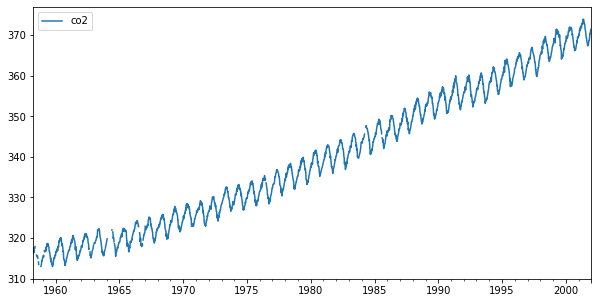

In [15]:
co2.plot()

## EL NINO

![](https://images.unsplash.com/photo-1454789476662-53eb23ba5907?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=752&q=80)
https://unsplash.com/photos/i9w4Uy1pU-s

In [16]:
sm.datasets.elnino.DESCRLONG

'This data contains the averaged monthly sea surface\ntemperature in degrees Celcius of the Pacific Ocean, between 0-10 degrees South\nand 90-80 degrees West, from 1950 to 2010.  This dataset was obtained from\nNOAA.\n'

In [17]:
elnino = sm.datasets.elnino.data.load_pandas().data

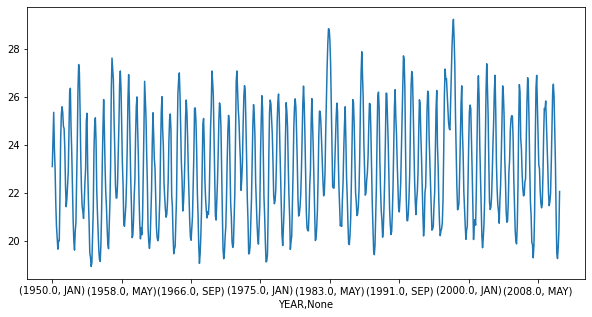

In [18]:
elnino.set_index('YEAR').stack().plot()

In [19]:
elnino = elnino.set_index('YEAR').stack()

## SAMSUNG

![](https://images.unsplash.com/photo-1612696874005-d015469bc660?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=696&q=80)

https://unsplash.com/photos/Jp_s8xBOBR4

### PRICES

In [20]:
prices = yf.download("SMSN.IL", period='5y')

[*********************100%***********************]  1 of 1 completed


In [21]:
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-10,913.5,923.5,913.50000,923.5,809.018433,13675
2017-04-11,910.0,911.5,908.00000,910.0,797.191833,26879
2017-04-12,920.0,924.0,910.26239,924.0,809.456482,15413
2017-04-13,935.5,939.0,931.50000,933.0,817.340759,8228
2017-04-18,909.0,909.5,900.50000,908.0,795.439758,15929


In [22]:
prices['Adj Close'].head(10)

Date
2017-04-10    809.018433
2017-04-11    797.191833
2017-04-12    809.456482
2017-04-13    817.340759
2017-04-18    795.439758
2017-04-19    789.745728
2017-04-20    773.101074
2017-04-21    785.365417
2017-04-24    798.068115
2017-04-25    825.225098
Name: Adj Close, dtype: float64

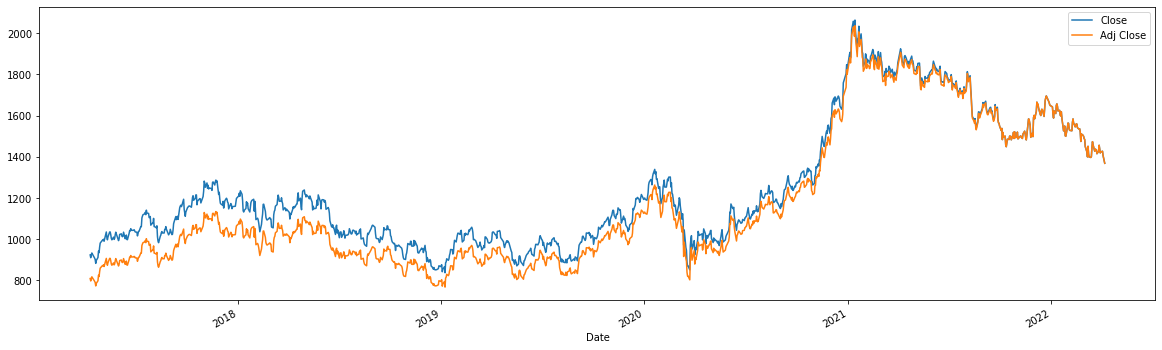

In [23]:
prices[['Close', 'Adj Close']].plot(figsize=(20,6))

### Revenues

In [24]:
fin = pd.read_csv('https://raw.githubusercontent.com/amarabuco/seriestemporais/main/samsung_fin.csv', decimal=',', index_col=0).T.drop('Currency')

In [25]:
index = pd.date_range(start='2013', end='2022', freq='Q')
index

DatetimeIndex(['2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [26]:
fin['index'] = index[:-1]
fin.set_index('index', inplace=True)

In [27]:
fin = fin.astype('float32')

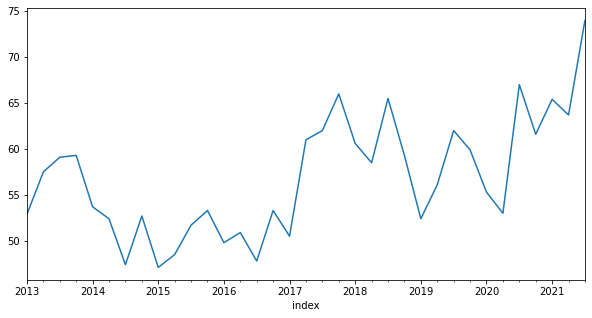

In [28]:
fin['Revenue'].plot(figsize=(10,5))

# Show me the code 💻

# Análise de Séries Temporais (TSA)

https://www.amazon.com.br/Introductory-Time-Paul-S-Cowpertwait/dp/0387886974 

## CO2

In [29]:
#co2_decomp = tsa.seasonal_decompose(co2, period=1)

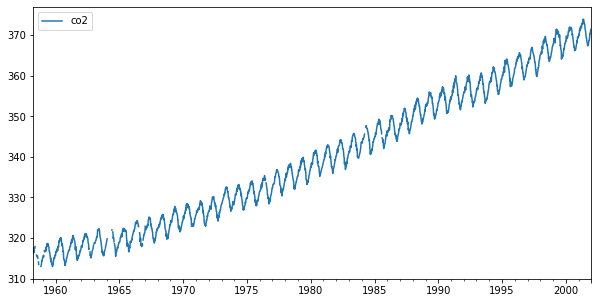

In [30]:
co2.plot()

Preenchimento dos valores ausentes com valor anterior da série

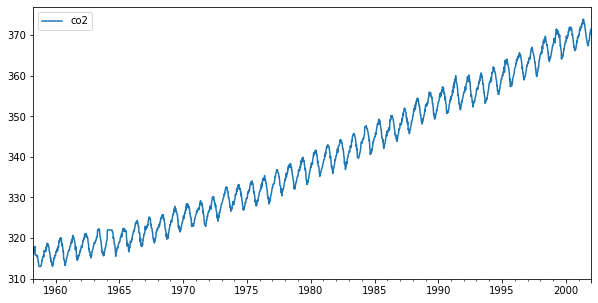

In [31]:
co2.fillna(method='bfill').plot()

In [32]:
co2.fillna(method='bfill', inplace=True)

Decomposição da séries: tendência, sazonalidade, resíduo

In [33]:
co2_decomp = tsa.seasonal_decompose(co2, period=365)

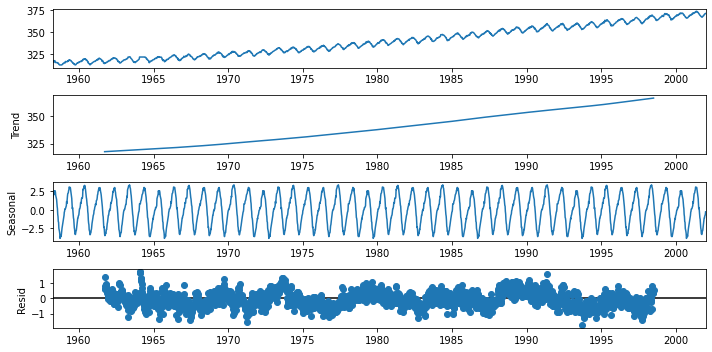

In [34]:
co2_decomp.plot();

### Stationarity

Estacionariedade: média e desvio constante ao longo do tempo

Média móvel de 5 dias

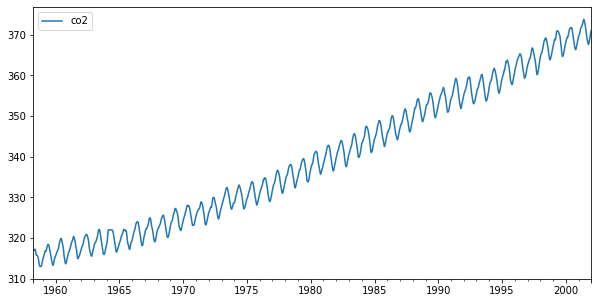

In [35]:
co2.rolling(5).mean().plot()

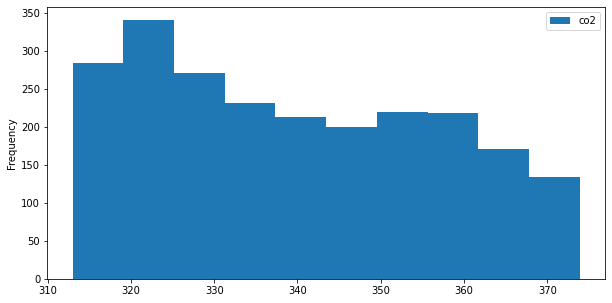

In [36]:
co2.plot.hist()

### Differentiation

![](https://images.unsplash.com/photo-1570294646112-27ce4f174e38?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2099&q=80)

Exemplo ilustrativo

* Série: distância percorrida ao longo do tempo
* Diferenciação de 1a ordem = velocidade (diferença entre as distâncias)
* Diferenciação de 2a ordem = aceleração (diferença entre as velocidades)
* Diferenciação de 3a ordem = arrancada (diferença entre as acelerações)


##### Diferentiation 1st order (d)

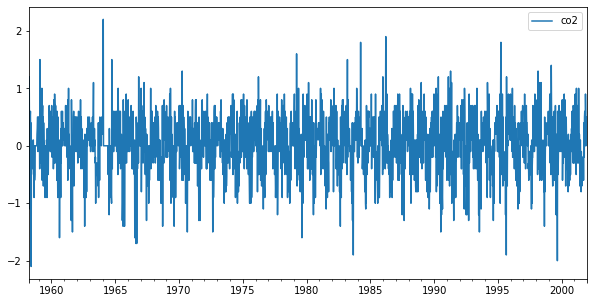

In [37]:
co2.diff().plot()

Após a diferenciação, a série passa a ter um comportamento estacionário

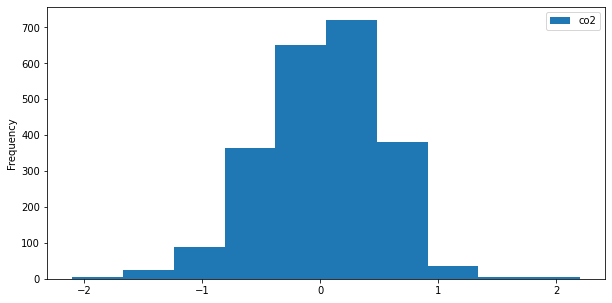

In [43]:
co2.diff().plot.hist()

Histograma após a diferenciação, aproxima-se de uma distribuição normal 

In [44]:
co2d1 = co2.diff().dropna()

Teste de estacionariedade

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

In [57]:
test, pvalue, lags, obs, critic, ic = tsa.stattools.adfuller(co2d1, regression='ct')
print(pvalue)
print(lags)

1.263479691185952e-22
27


O teste Dickey-Fuller (ADF) rejeita a hipótese nula de não estacionaridade usando 27 lags, o p-valor foi inferior 1%, portanto há evidência estatística de que a série diferenciada é estacionária.

### Autocorrelation

A correlation of a variable with itself at different times
is known as autocorrelation or serial correlation.

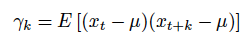

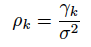

Série com lag (atraso) = 1

In [ ]:
co2.shift(1)

,co2
1958-03-29,NaN
1958-04-05,316.1
1958-04-12,317.3
1958-04-19,317.6
1958-04-26,317.5
...,...
2001-12-01,370.3
2001-12-08,370.3
2001-12-15,370.8
2001-12-22,371.2


autocorrelação com lag 1

In [ ]:
co2.corrwith(co2.shift(1))

co2    0.999579
dtype: float64

Gráfico de autocorrelação da série com 35 lags

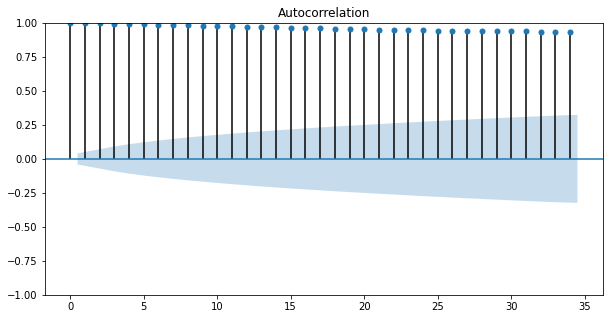

In [ ]:
plot_acf(co2);

In [ ]:
co2d1.corrwith(co2d1.shift(1))

co2    0.080625
dtype: float64

Gráfico de autocorrelação da série diferenciada com 35 lags

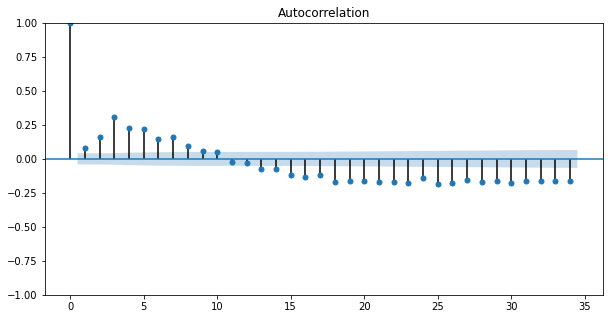

In [ ]:
plot_acf(co2d1);

### Partial Correlation

The partial autocorrelation at lag k is the correlation that
results after removing the effect of any correlations due to the terms at shorter
lags.

Gráfico de autocorrelação parcial da série com 35 lags

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


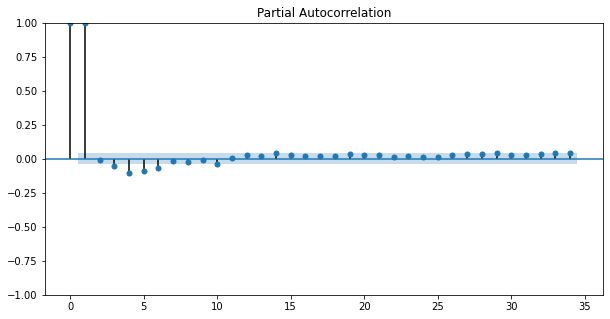

In [ ]:
plot_pacf(co2);

A autocorrelação parcial mostra que poucos lags apresentação correlação com significância estatística, ao contrário do que autocorrelação faz crer.

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

### AR model (p)

Separação dos dados:
* 80% treino
* 20% teste

In [ ]:
co2_train = co2.iloc[:int(len(co2) * 0.8)]
co2_test = co2.iloc[int(len(co2) * 0.8):]

In [ ]:
co2_test

,co2
1993-04-03,359.1
1993-04-10,358.8
1993-04-17,359.4
1993-04-24,360.0
1993-05-01,359.6
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [ ]:
#co2_model =  AutoReg(co2_train, 3)

In [ ]:
#res = co2_model.fit()
#res.summary()

Definição e treino do modelo AR com 3 lags

In [ ]:
co2_model =  ARIMA(co2_train, order=(3,0,0))

In [ ]:
res = co2_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                 1827
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1271.939
Date:                Fri, 08 Apr 2022   AIC                           2553.877
Time:                        18:19:35   BIC                           2581.429
Sample:                    03-29-1958   HQIC                          2564.040
                         - 03-27-1993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        333.4630     18.827     17.712      0.000     296.562     370.364
ar.L1          1.0606      0.023     45.342      0.000       1.015       1.106
ar.L2          0.1011      0.033      3.069      0.002       0.037       0.166
ar.L3         -0.1621      0.022     -7.273      0.000      -0.206      -0.118
sigma2         0.2347      0.007     36.058      0.000       0.222       0.247
===================================================================================
Ljung-Box (L1) (Q):                   4.65   Jarque-Bera (JB):                83.71
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.25
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Análise dos resíduos
* Não normalidade da distribuição dos resíduos
* Correlograma apresenta lags com significância estatística

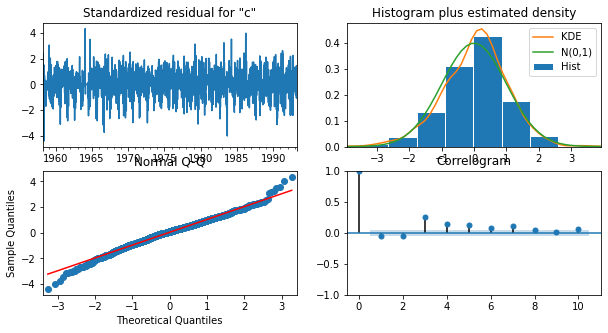

In [ ]:
res.plot_diagnostics();

In [ ]:
res2 = res.apply(co2_test)

In [ ]:
res2.predict()

1993-04-03    333.462963
1993-04-10    359.092161
1993-04-17    358.769877
1993-04-24    359.378076
1993-05-01    360.123718
                 ...    
2001-12-01    370.468416
2001-12-08    370.383207
2001-12-15    370.816257
2001-12-22    371.291046
2001-12-29    371.356507
Freq: W-SAT, Name: predicted_mean, Length: 457, dtype: float64

In [ ]:
pd.concat([res2.predict(),co2_test],axis=1)

,predicted_mean,co2
1993-04-03,333.462963,359.1
1993-04-10,359.092161,358.8
1993-04-17,358.769877,359.4
1993-04-24,359.378076,360.0
1993-05-01,360.123718,359.6
...,...,...
2001-12-01,370.468416,370.3
2001-12-08,370.383207,370.8
2001-12-15,370.816257,371.2
2001-12-22,371.291046,371.3


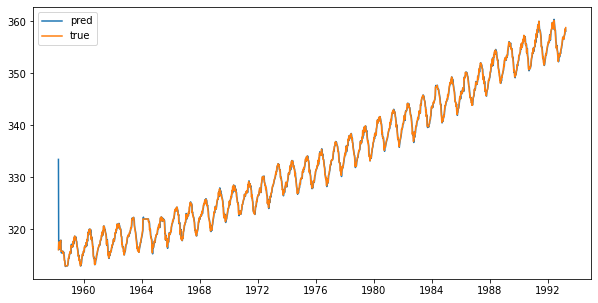

In [ ]:
fig, ax = plt.subplots()
ax.plot(res.predict(), label='pred')
ax.plot(co2_train, label='true')
plt.legend()

Análise das métricas de erro do modelo
* R2: mais próximo de 1 é melhor
* MSE: mais próximo de 0 é melhor
* MAE: mais próximo de 0 é melhor

In [ ]:
print('CO2 - AR model Results')
print('r2' ,r2_score(res2.predict(), co2_test))
print('mse' ,mean_squared_error(res2.predict(), co2_test))
print('mae', mean_absolute_error(res2.predict(), co2_test))

CO2 - AR model Results
r2 0.9346657850445118
mse 1.6916515051770935
mae 0.45419138271824655


Previsão da série para o conjunto de teste com multi step recursivo, ou seja, sem considerar os valores reais a cada passo

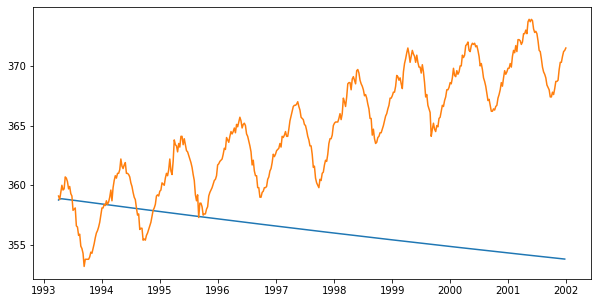

In [ ]:
fig, ax = plt.subplots()
ax.plot(pd.concat([res.forecast(int(len(co2)*0.2)), co2_test],axis=1))

Seleção da melhor ordem para o modelo AR

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [ ]:
ar_order_selection = arma_order_select_ic(co2, max_ar=10, max_ma=0)

In [ ]:
ar_order_selection

{'bic':                0
 0   19465.329034
 1    3314.112488
 2    3306.033472
 3    3253.354474
 4    3054.237738
 5    2972.879556
 6    2926.874409
 7    2933.715687
 8    2940.836781
 9    2937.767647
 10   2930.141795, 'bic_min_order': (6, 0)}

## EL NINO

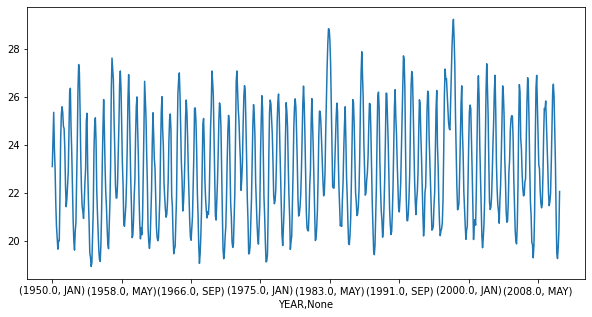

In [ ]:
elnino.plot()

In [ ]:
elnino_decomp = tsa.seasonal_decompose(elnino.values, period=12)

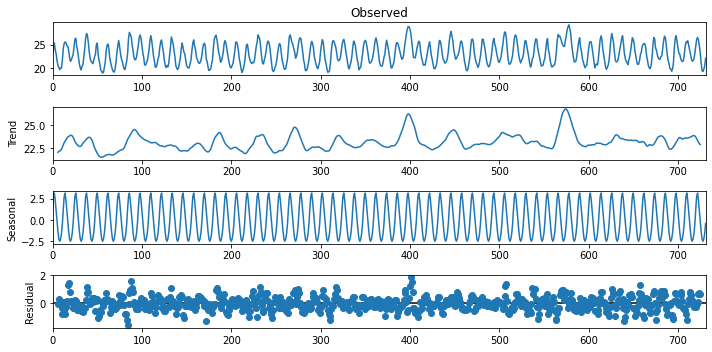

In [ ]:
elnino_decomp.plot();

### Stationarity

ok, no diff is necessary.

Será que passa no teste ADF?

### ACF

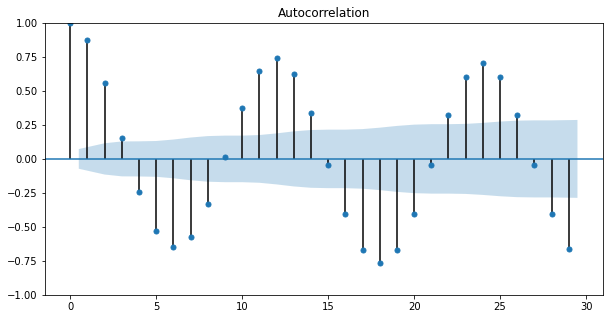

In [ ]:
plot_acf(elnino);

### PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


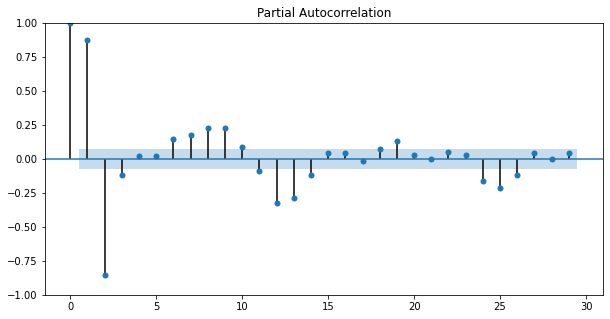

In [ ]:
plot_pacf(elnino);

### AR Model (p)

Definição e treino do modelo AR com 3 lags

In [ ]:
elnino_armodel =  AutoReg(elnino.values, 3)

In [ ]:
res_elnino = elnino_armodel.fit()
res_elnino.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  732
Model:                     AutoReg(3)   Log Likelihood                -635.122
Method:               Conditional MLE   S.D. of innovations              0.578
Date:                Fri, 08 Apr 2022   AIC                           1280.244
Time:                        18:46:57   BIC                           1303.203
Sample:                             3   HQIC                          1289.102
                                  732                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2571      0.304     20.581      0.000       5.661       6.853
y.L1           1.4892      0.037     40.636      0.000       1.417       1.561
y.L2          -0.6167      0.062     -9.919      0.000      -0.739      -0.495
y.L3          -0.1435      0.037     -3.911      0.000      -0.215      -0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9335           -0.5091j            1.0633           -0.0795
AR.2            0.9335           +0.5091j            1.0633            0.0795
AR.3           -6.1654           -0.0000j            6.1654           -0.5000
-----------------------------------------------------------------------------
"""

Análise dos resíduos
* Normalidade da distribuição (é o ideal)
* No correlograma alguns lags maiores que 3 possuem significância estatística

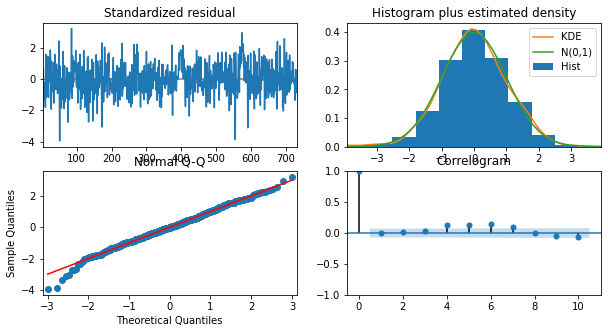

In [ ]:
res_elnino.plot_diagnostics();

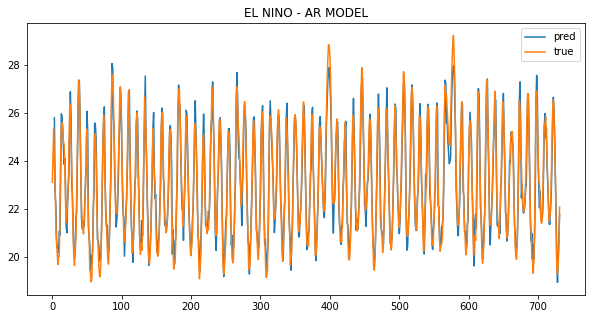

In [ ]:
fig, ax = plt.subplots()
ax.plot(res_elnino.predict(), label='pred')
ax.plot(elnino.values, label='true')
plt.title('EL NINO - AR MODEL')
plt.legend()

### MA Model (q)

Definição e treino do modelo média móvel com 3 lags

In [ ]:
elnino_ma_model = ARIMA(elnino.values, order=(0,0,3))

In [ ]:
res_elnino_ma = elnino_ma_model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
res_elnino_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  732
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -841.193
Date:                Fri, 08 Apr 2022   AIC                           1692.386
Time:                        18:49:41   BIC                           1715.365
Sample:                             0   HQIC                          1701.250
                                - 732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0938      0.125    184.940      0.000      22.849      23.339
ma.L1          1.5159      0.034     44.886      0.000       1.450       1.582
ma.L2          1.2860      0.049     26.351      0.000       1.190       1.382
ma.L3          0.5547      0.033     16.565      0.000       0.489       0.620
sigma2         0.5807      0.034     16.939      0.000       0.514       0.648
===================================================================================
Ljung-Box (L1) (Q):                  40.70   Jarque-Bera (JB):                 5.35
Prob(Q):                              0.00   Prob(JB):                         0.07
Heteroskedasticity (H):               0.93   Skew:                             0.11
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Análise dos resíduos
* Não normalidade da distribuição
* Correlograma: vários lags apresenta correlação significante

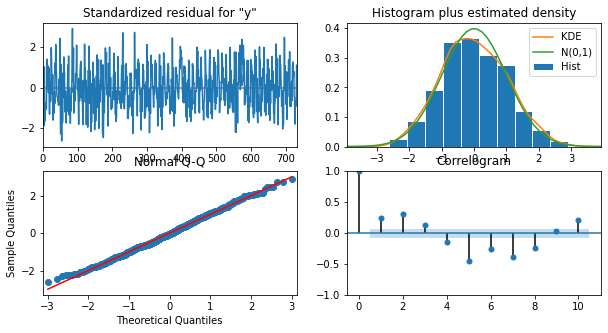

In [ ]:
res_elnino_ma.plot_diagnostics();

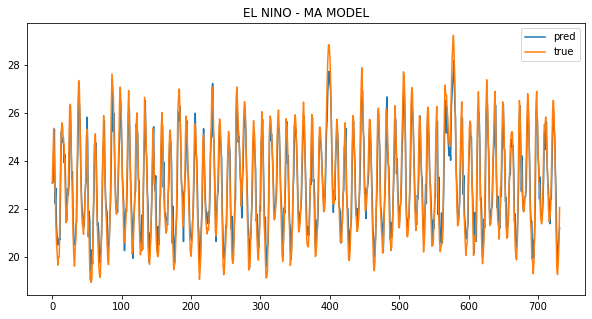

In [ ]:
fig, ax = plt.subplots()
ax.plot(res_elnino_ma.predict(), label='pred')
ax.plot(elnino.values, label='true')
plt.title('EL NINO - MA MODEL')
plt.legend()

Comparação dos resultados

In [ ]:
results = {}

In [ ]:
print('MA model Results')
print('r2' , r2_score(res_elnino_ma.predict(), elnino))
print('mse' ,mean_squared_error(res_elnino_ma.predict(), elnino))
print('mae', mean_absolute_error(res_elnino_ma.predict(), elnino))
results['MA'] = {'r2':r2_score(res_elnino_ma.predict(), elnino), \
                 'mse': mean_squared_error(res_elnino_ma.predict(), elnino), 
                 'mae': mean_absolute_error(res_elnino_ma.predict(), elnino)}

MA model Results
r2 0.8336524164504655
mse 0.5822128398584593
mae 0.6205100149475412


In [ ]:
print('AR model Results')
print('r2' ,r2_score(res_elnino.predict()[3:], elnino[3:])) # precisa retirar os três primeiros lags que estão como NaN
print('mse' ,mean_squared_error(res_elnino.predict()[3:], elnino[3:]))
print('mae', mean_absolute_error(res_elnino.predict()[3:], elnino[3:]))
results['AR'] = {'r2':r2_score(res_elnino.predict()[3:], elnino[3:]), \
                 'mse': mean_squared_error(res_elnino.predict()[3:], elnino[3:]),
                 'mae': mean_absolute_error(res_elnino.predict()[3:], elnino[3:])}

AR model Results
r2 0.9290737878737338
mse 0.3343960128534028
mae 0.4518358441205878


### Auto arima (p, d, q)


Modelo ARIMA
* p = AR
* d = diferenciação
* q = MA

Auto arima faz uma busca em grade pela melhor ordem para o modelo:
* p = [0, 10]
* d = [0, 2]
* q = [0, 5]

In [ ]:
elnino_arima = pm.auto_arima(elnino, max_ar=10, max_ma=5, max_d=2, seasonal=False, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1628.946, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6682.455, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5694.224, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1680.984, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1674.500, Time=0.23 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.58 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1620.547, Time=0.94 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1632.710, Time=0.39 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1632.080, Time=1.00 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=1.18 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.24 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=1609.396, Time=1.21 sec
 ARIMA(4,0,4)(0,0,0)[0]             : AIC=inf, Time=2.90 sec
 ARIMA(3,0,5)(0,0,0)[0]             : AIC=1610.458, Time=1

In [ ]:
elnino_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  732
Model:               SARIMAX(4, 0, 4)   Log Likelihood                -526.885
Date:                Fri, 08 Apr 2022   AIC                           1073.769
Time:                        19:00:21   BIC                           1119.727
Sample:                             0   HQIC                          1091.498
                                - 732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2274      0.277      4.430      0.000       0.684       1.770
ar.L1          1.6465      0.038     43.644      0.000       1.573       1.720
ar.L2          0.0335      0.083      0.402      0.687      -0.129       0.196
ar.L3         -1.6183      0.082    -19.713      0.000      -1.779      -1.457
ar.L4          0.8850      0.037     24.191      0.000       0.813       0.957
ma.L1         -0.4501      0.051     -8.805      0.000      -0.550      -0.350
ma.L2         -0.9295      0.059    -15.880      0.000      -1.044      -0.815
ma.L3          0.7388      0.040     18.394      0.000       0.660       0.818
ma.L4          0.2871      0.040      7.217      0.000       0.209       0.365
sigma2         0.2432      0.012     20.841      0.000       0.220       0.266
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                28.18
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.15
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Análise dos resíduos
* Normalidade da distribuição
* Correlograma com baixa significância entre os lags

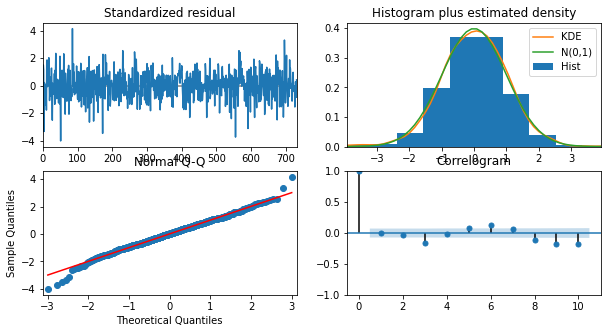

In [ ]:
elnino_arima.plot_diagnostics();

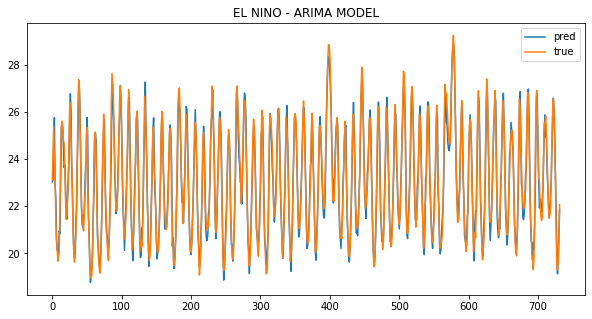

In [ ]:
fig, ax = plt.subplots()
ax.plot(elnino_arima.predict_in_sample(), label='pred')
ax.plot(elnino.values, label='true')
plt.title('EL NINO - ARIMA MODEL')
plt.legend()

In [ ]:
print('ARIMA model Results')
print('r2' ,r2_score(elnino_arima.predict_in_sample(), elnino))
print('mse' ,mean_squared_error(elnino_arima.predict_in_sample(), elnino))
print('mae', mean_absolute_error(elnino_arima.predict_in_sample(), elnino))
results['ARIMA'] = {'r2':r2_score(elnino_arima.predict_in_sample(), elnino), \
                 'mse': mean_squared_error(elnino_arima.predict_in_sample(), elnino), 
                 'mae': mean_absolute_error(elnino_arima.predict_in_sample(), elnino)}

ARIMA model Results
r2 0.948494338134337
mse 0.24822362477533827
mae 0.38883645021221386


Comparação dos resultados

In [ ]:
pd.DataFrame(results)

,MA,ARIMA,AR
r2,0.833652,0.948494,0.929074
mse,0.582213,0.248224,0.334396
mae,0.620510,0.388836,0.451836


Observações:
1. One step ahead.
3. Modelos lineares.

# Show me the money 🤑

## Prices

Série adj close será usada por não conter alterações por eventos nos preços, como splits e dividendos.

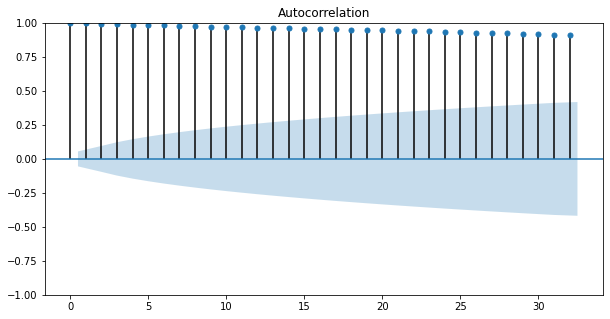

In [58]:
plot_acf(prices['Adj Close']);

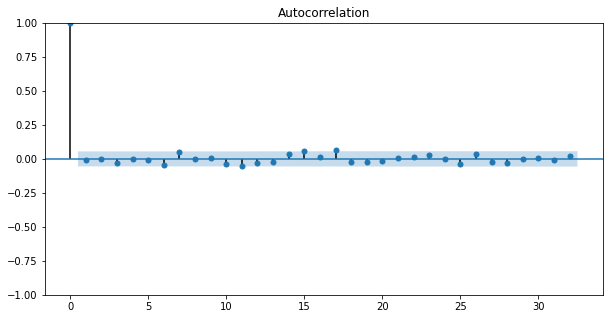

In [59]:
plot_acf(prices['Adj Close'].diff().fillna(0));

Autocorrelação não apresenta lags com significância.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


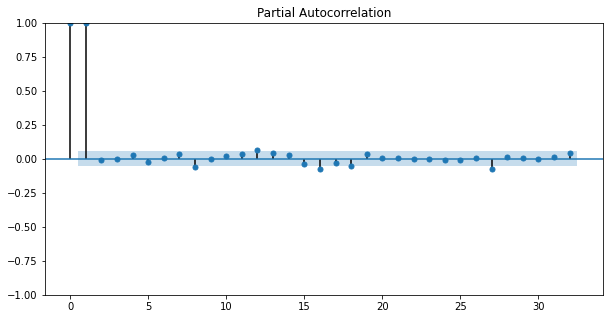

In [60]:
plot_pacf(prices['Adj Close']);

Autocorrelação parcial não apresenta lags com significância.

Separação 
* Treino: Últimos 5 anos, exceto últimos 30 dias
* Teste: Últimos 30 dias

In [61]:
y_train = prices['Adj Close'].iloc[:-30]
y_test = prices['Adj Close'].iloc[-30:]

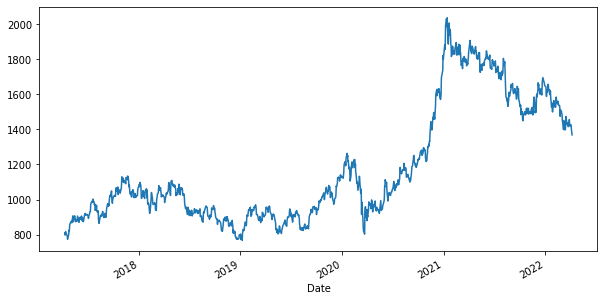

In [62]:
prices['Adj Close'].plot()

Série não estacionária, viola pressupostos dos modelos ARIMA e metodologia Box-Jenkins.

In [76]:
# help(pm.auto_arima)

In [78]:
prices_sarima = pm.auto_arima(y_train, max_p=10, max_d=2, max_q=5, max_P=10, max_D=2, max_Q=5, seasonal=True, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11195.108, Time=3.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11187.309, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11189.224, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11189.224, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11186.100, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11191.225, Time=0.28 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.605 seconds


Random walk!!! 😱

Informação do passado não ajuda a prever o futuro. Não há relação linear temporal entre os dados.

In [79]:
prices_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1235
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5592.050
Date:                Sat, 09 Apr 2022   AIC                          11186.100
Time:                        14:28:40   BIC                          11191.218
Sample:                             0   HQIC                         11188.025
                               - 1235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       505.4330     13.848     36.498      0.000     478.291     532.575
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               276.32
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.44   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Análise dos resíduos
* Não normalidade da distribuição
* 

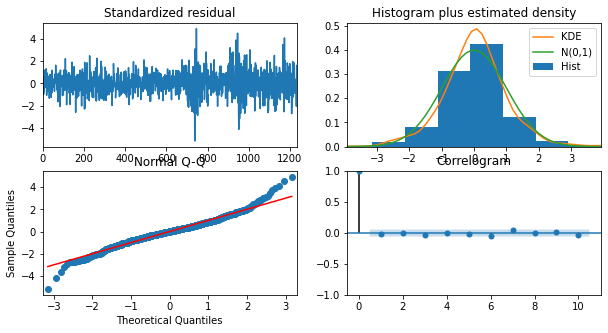

In [65]:
prices_sarima.plot_diagnostics();

In [66]:
prices_fitted = pd.Series(prices_sarima.predict_in_sample(), index=y_train.index)

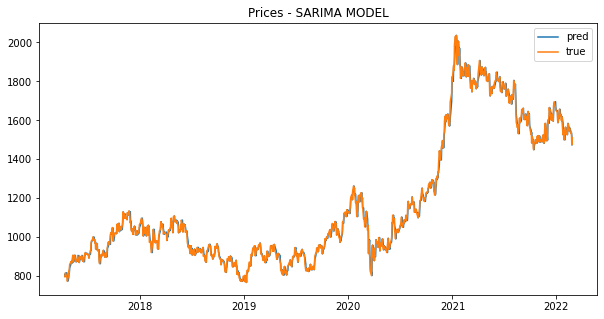

In [67]:
fig, ax = plt.subplots()
ax.plot(prices_fitted.iloc[1:], label='pred')
ax.plot(y_train.iloc[1:], label='true')
plt.title('Prices - SARIMA MODEL')
plt.legend()

Previsão do próprio conjunto inteiro dos dados parece boa no gráfico, apesar de tudo, mas será? 

Vamos testar se isso é verdade quando usamos os conjuntos separados de treino e teste.

Treino do modelo ARIMA (0,1,0).

In [80]:
prices_sarima_train = ARIMA(y_train, order=prices_sarima.order).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Substituição dos dados de treino pelo de teste para realizar as previsões de teste.

In [69]:
prices_sarima_test = prices_sarima_train.apply(y_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


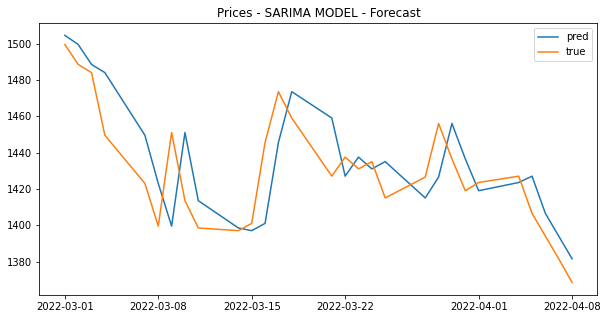

In [70]:
fig, ax = plt.subplots()
ax.plot(prices_sarima_test.predict().iloc[1:], label='pred')
ax.plot(y_test.iloc[1:], label='true')
plt.title('Prices - SARIMA MODEL - Forecast')
plt.legend()

A previsão mostra que o modelo está com o comportamento random walk (passeio aleatório). Ele usa o dado mais recente como previsão, e não é capaz de extrair um padrão (equação) dos dados, então sempre está "atrasado" em relação ao comportamento real dos dados.



In [71]:
print('SARIMA model Results')
print('r2' ,r2_score(prices_sarima_test.predict().iloc[1:], y_test.iloc[1:]))
print('mse' ,mean_squared_error(prices_sarima_test.predict().iloc[1:], y_test.iloc[1:]))
print('mae', mean_absolute_error(prices_sarima_test.predict().iloc[1:], y_test.iloc[1:]))

SARIMA model Results
r2 0.5218055978584606
mse 486.3103448275857
mae 17.896551724137876


Vamos verificar como será a previsão do modelo se não atualizarmos os dados de entrada com os dados conhecidos a medida avançamos na série, ou seja, usando um multi step recursivo, em que as previsões passadas alimentam as previsões futuras, usando o parâmetro <u>dynamic</u>

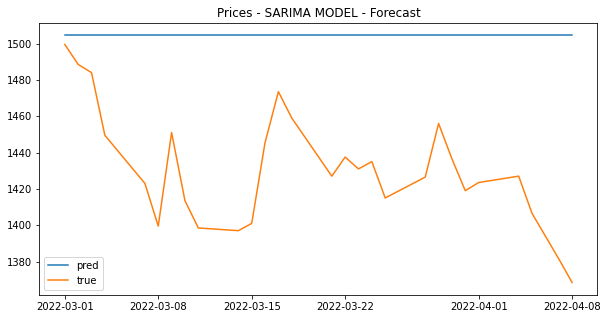

In [85]:
fig, ax = plt.subplots()
ax.plot(prices_sarima_test.predict(dynamic=1).iloc[1:], label='pred', )
ax.plot(y_test.iloc[1:], label='true')
plt.title('Prices - SARIMA MODEL - Forecast')
plt.legend()

Se não houver atualização do modelo com os dados mais recentes, a sua previsão é uma reta, ou seja, não há previsão, pois só replica o último valor conhecido.

## Revenues ???

Será que a previsão das receitas da Samsung teria o mesmo resultados do que o preço das ações?